# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gradient Descent Method

In [2]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.0001, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    # train model
    def fit(self, x, y):
        # number of rows and columns in input x matrix
        n_rows, n_features = x.shape
        # initilize weights as zeros
        self.weights = np.zeros(n_features)
        # initialize bias as zero
        self.bias = 0

        for i in range(self.iterations):
            # calculate the prediction using current weight and bias
            y_pred = x @ self.weights + self.bias

            # gradients
            # partial derivative/gradient of loss w.r.t weights vector
            dw = (1/n_rows) * x.T @ (y_pred - y)
            # partial derivative/gradient of loss w.r.t bias term, sum up all errors
            db = (1/n_rows) * np.sum(y_pred - y)

            # update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate *db

    def predict(self, x):
        if self.weights is None or self.bias is None:
            raise Exception('Model not ready yet! call fit()')
        # return model predictions
        return x @ self.weights + self.bias

In [3]:
# data
np.random.seed(1)

x = np.random.uniform(0,100, 1000).reshape(-1, 1) # shape (1000, 1)
true_slope = 3
true_intercept = 7
noise = np.random.normal(loc=0,scale=20, size=(1000,))

y = (true_slope * x.flatten()) + true_slope + noise

In [4]:
print('x:', x[:3],'\n\ny: ',y[:3])

x: [[4.17022005e+01]
 [7.20324493e+01]
 [1.14374817e-02]] 

y:  [142.61761177 212.61326364  19.32117503]


In [5]:
# object of LinearRegressionGD class
gd_model = LinearRegressionGD()
# fit model
gd_model.fit(x,y)
# weights and bias
print(f'Weights: {gd_model.weights}\nBias: {gd_model.bias}')

# predictions
gd_predictions = gd_model.predict(x)
print(gd_predictions[:5])

Weights: [3.05763891]
Bias: 0.13922220429454474
[1.27649493e+02 2.20388442e+02 1.74193894e-01 9.25816061e+01
 4.50118745e+01]


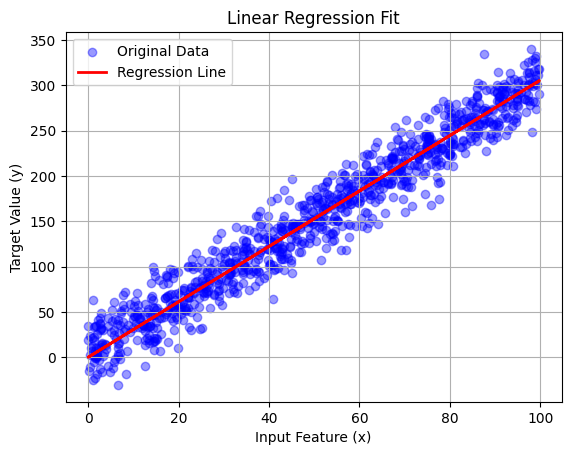

In [6]:
# plot original data
plt.scatter(x, y, color='blue', alpha=0.4, label='Original Data')

# plot predictions
plt.plot(x, gd_predictions, color='red', linewidth=2, label='Regression Line')


plt.title('Linear Regression Fit')
plt.xlabel('Input Feature (x)')
plt.ylabel('Target Value (y)')
plt.legend()
plt.grid(True)
plt.show()